# NEAREST NEIGHBORS!

This tutorial walks through some basics using sklearn.neighbors.  

References:
* User Guide: http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors
* API: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors, datasets

# Following: http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# Load just 2 features from the Iris Dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

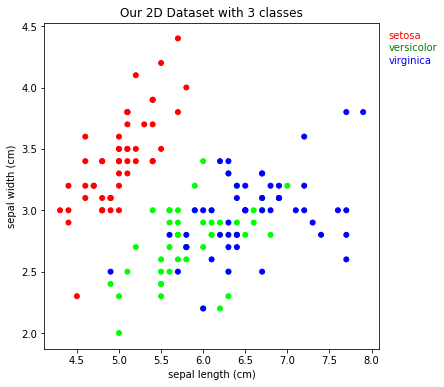

In [64]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,s=25, cmap=cmap_bold)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.text(8.2,4.4,iris.target_names[0],color='red')
plt.text(8.2,4.3,iris.target_names[1],color='green')
plt.text(8.2,4.2,iris.target_names[2],color='blue')
plt.title('Our 2D Dataset with 3 classes')
plt.legend()
plt.show()

---
# Basic Usage

In [69]:
clf = neighbors.KNeighborsClassifier()  #defaults to 5 neighbors
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [70]:
clf.score(X,y)

0.83333333333333337

With k=1 we always getting score of 1 on the training set.  As k increases this number goes down.  Test/train split is always important!

In [74]:
# Function to plot boundaries
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
def plot_decision(model,X,y,cmap_points, cmap_regions):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_regions)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points,edgecolor='k', s=20)
    

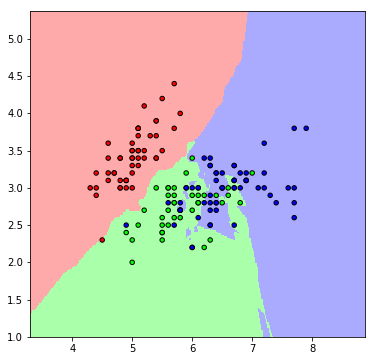

In [75]:
plt.figure(figsize=(6,6))
plot_decision(clf,X,y,cmap_bold,cmap_light)

***
# Distances
Now peek under the hood and see how classification works.  Make a new point and predict what it should be

In [133]:
new = np.array([[4.6,2.6]])

In [139]:
clf.predict(new)  # in this example, 0=red, 1=green, 2=blue

array([0])

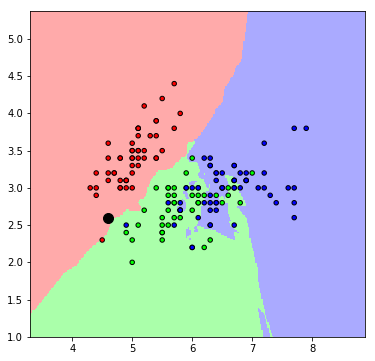

In [160]:
plt.figure(figsize=(6,6))
plot_decision(clf,X,y,cmap_bold,cmap_light) # new point is large, black circle
plt.scatter(new[:,0], new[:,1], color='black',s=100)
plt.show()

In [137]:
dist, ind = clf.kneighbors(new,n_neighbors=5,return_distance=True)

In [138]:
print(np.r_[dist,ind,y[ind]])

[[   0.31622777    0.31622777    0.36055513    0.36055513    0.4472136 ]
 [  41.          106.            8.           57.           38.        ]
 [   0.            2.            0.            1.            0.        ]]


In [140]:
clf.predict_proba(new)

array([[ 0.6,  0.2,  0.2]])

We found the 5 nearest neighbors.  There is a tie between the closest two (red and blue), but as we expand out our search we see that 3 of the 5 are reds.  So I predict 60% likely to be red, 20% prob each for green and blue

***
# Varying K

Make some plots showing how k changes decision boundaries.  Pay attention to the outliers!

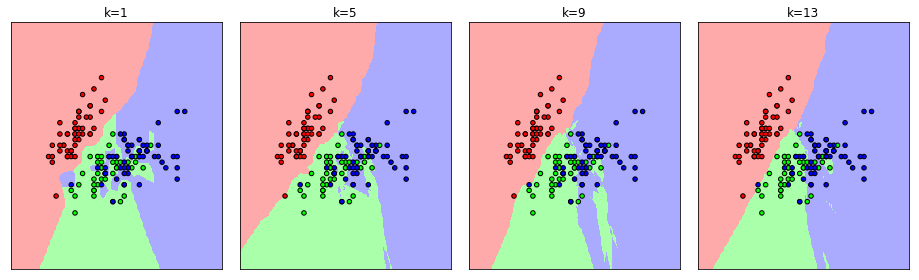

In [184]:
plt.figure(figsize=(16,4))
for i in range(4):
  k = 4*i+1;  
  clf = neighbors.KNeighborsClassifier(n_neighbors=k)  
  clf.fit(X,y) 
  ax = plt.subplot(1,5,i+1)
  ax.set_xticks(())
  ax.set_yticks(())
  plot_decision(clf,X,y,cmap_bold,cmap_light) # new point is large, black circle
  ax.set_title('k=%i'%k)
plt.tight_layout()
plt.show()


Repeat same plot, but change weights from uniform to distance
Now closer neighbors get a bigger vote

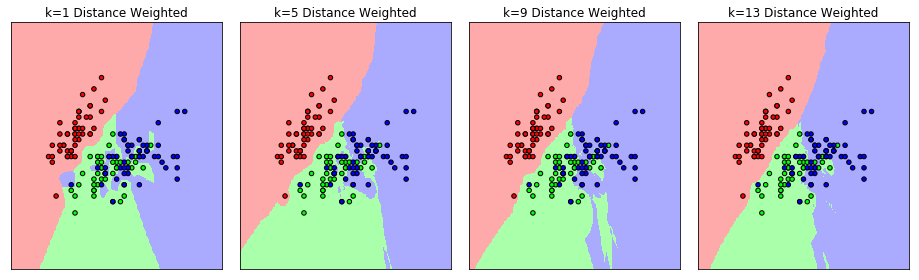

In [187]:
plt.figure(figsize=(16,4))
for i in range(4):
  k = 4*i+1;  
  clf = neighbors.KNeighborsClassifier(n_neighbors=k,weights='distance')  
  clf.fit(X,y) 
  ax = plt.subplot(1,5,i+1)
  ax.set_xticks(())
  ax.set_yticks(())
  plot_decision(clf,X,y,cmap_bold,cmap_light) # new point is large, black circle
  ax.set_title('k=%i Distance Weighted'%k)
plt.tight_layout()
plt.show()

Notice how outliers now carve out a little island around themselves. Let's find how weights change our little classification exercise

In [189]:
clf_uni = neighbors.KNeighborsClassifier(n_neighbors=5,weights='uniform').fit(X,y)
clf_uni.predict_proba(new)

array([[ 0.6,  0.2,  0.2]])

In [191]:
clf_dist = neighbors.KNeighborsClassifier(n_neighbors=5,weights='distance').fit(X,y)
clf_dist.predict_proba(new)

array([[ 0.57925033,  0.19659588,  0.22415379]])

Distance weighting makes our little point more likely to be green